In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import stft
from scipy.signal import spectrogram
from scipy.io import wavfile

# Soundcard Data

### Spectrogram plotting script

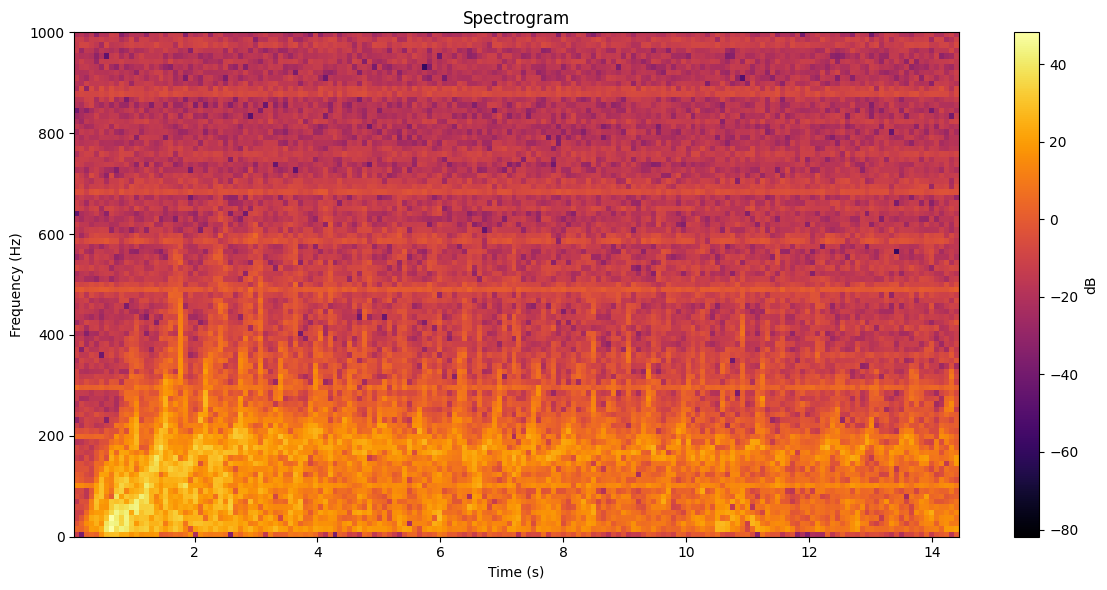

In [4]:

# Plot the original spectrogram# Load the WAV file
filename = 'WalkingData.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)                                                                                  
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Code with some post-processing using Guassian Smoothing

In [10]:
# # Load the WAV file
# filename = 'RunningData.wav'  # Replace with your WAV file's path
# sample_rate, audio_data = wavfile.read(filename)

# # Create a spectrogram
# frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# # Apply Gaussian smoothing
# from scipy.ndimage import gaussian_filter
# Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 0.5))

# # Plot the spectrogram with improvements
# plt.figure(figsize=(12, 6))
# plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
#            extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
# plt.ylim(0,7500)
# plt.colorbar(label='dB')
# plt.title('Spectrogram')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.tight_layout()
# plt.show()

### Soundcard with DC Power Supply

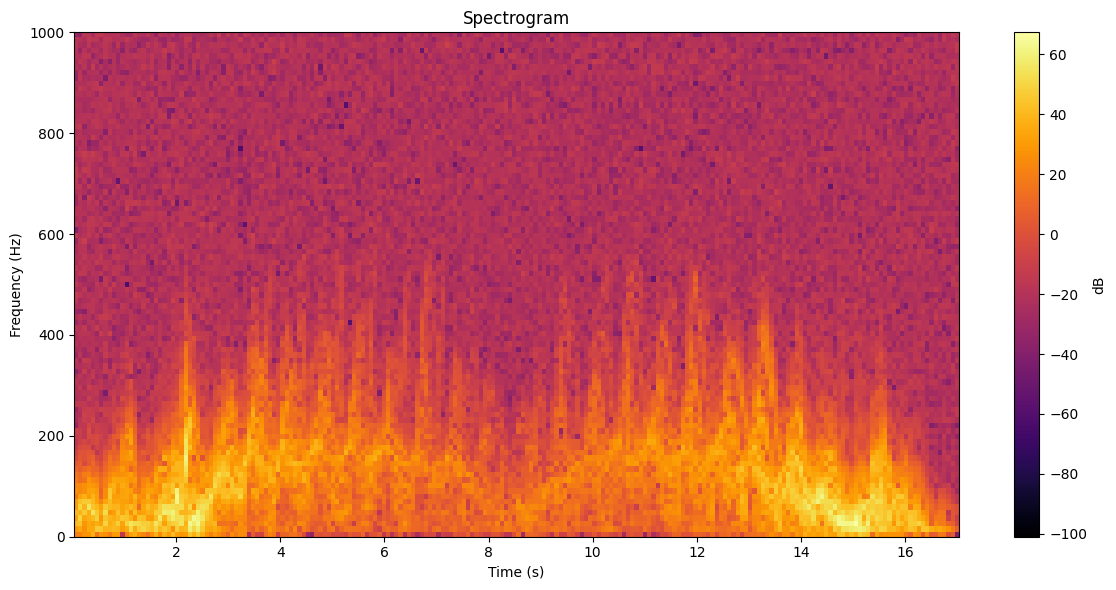

In [35]:
# Plot the original spectrogram# Load the WAV file
filename = 'WalkingDataDCPowerSupply.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

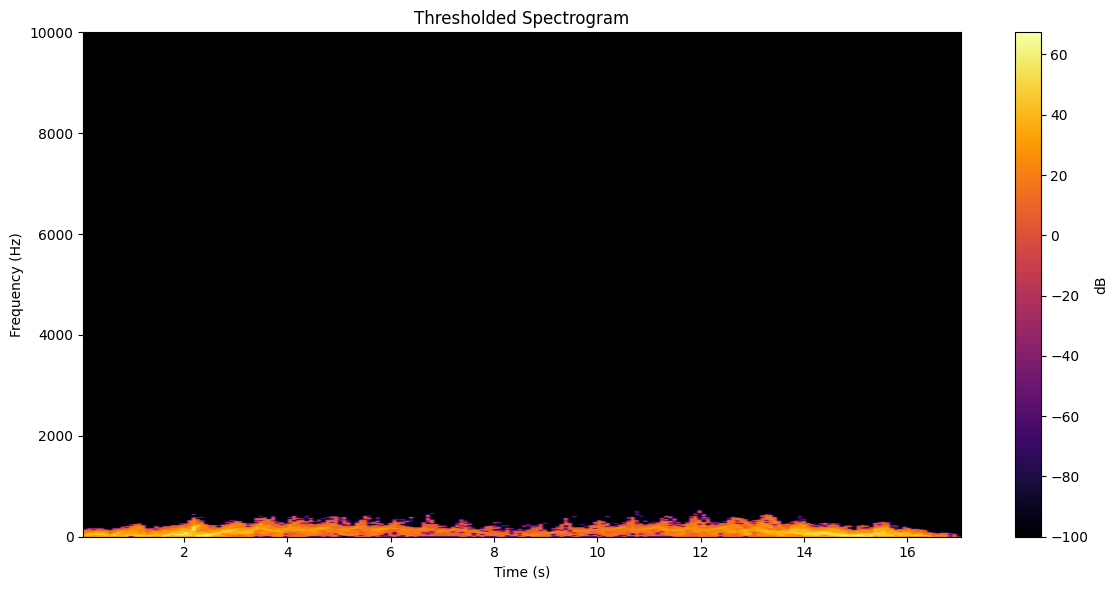

In [36]:
# Convert the spectrogram to dB scale
Sxx_dB = 10 * np.log10(Sxx)

# Apply thresholding
threshold = 0  # dB
Sxx_dB[Sxx_dB < threshold] = -100

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_dB, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 10000)
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Soundcard With DC Power Supply AD620 Gain = 50 

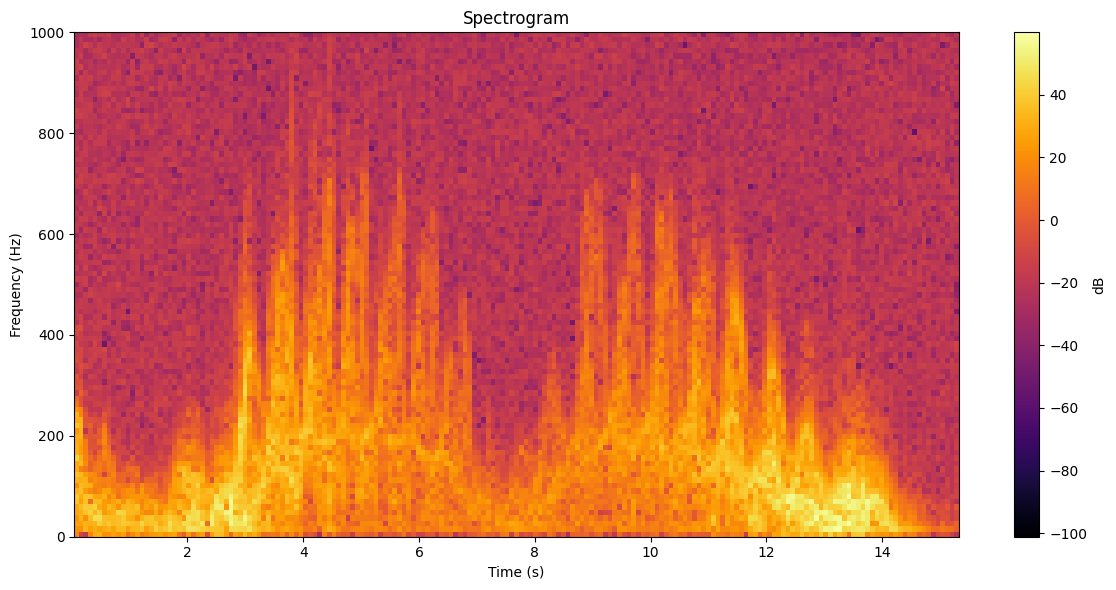

In [27]:
# Plot the original spectrogram# Load the WAV file
filename = 'AD620_DC_Supply_IPM_Gain_50x.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

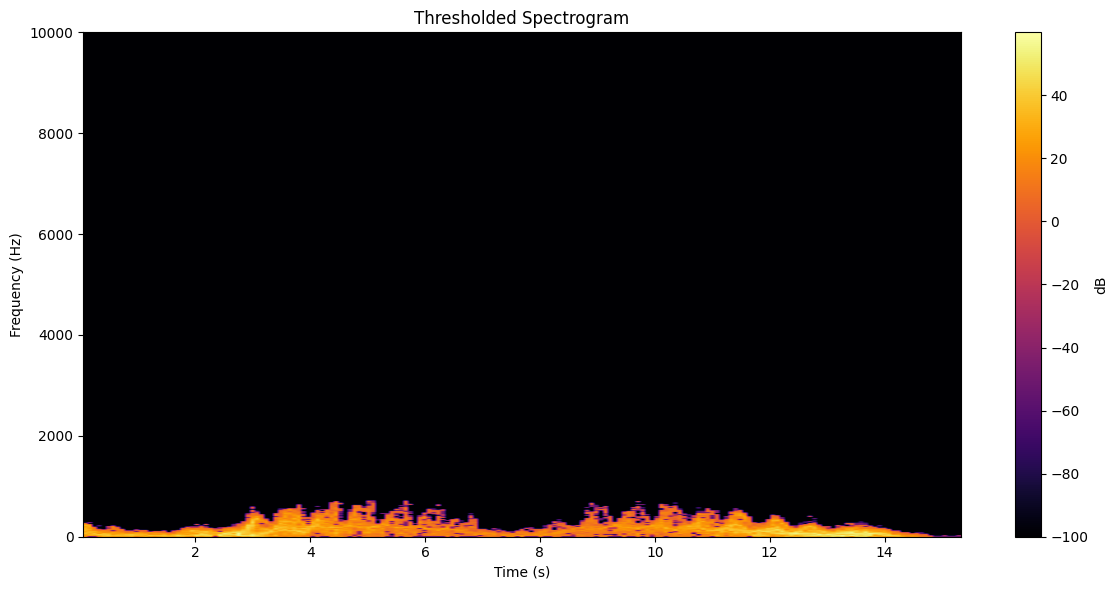

In [29]:
# Convert the spectrogram to dB scale
Sxx_dB = 10 * np.log10(Sxx)

# Apply thresholding
threshold = 0  # dB
Sxx_dB[Sxx_dB < threshold] = -100

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_dB, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 10000)
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Soundcard With DC Power Supply AD620 Gain = 200

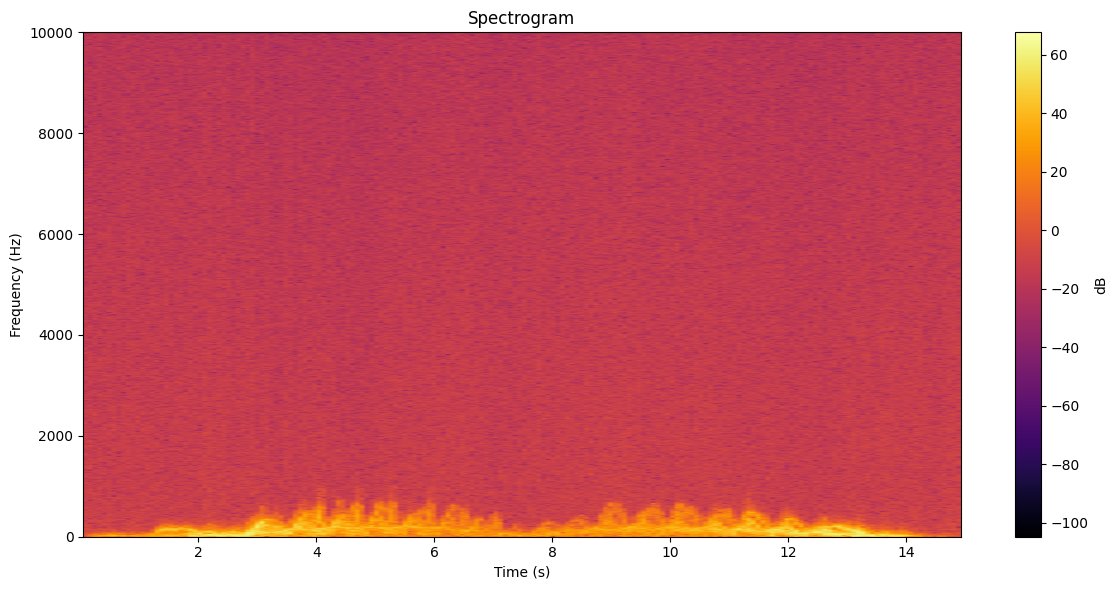

In [33]:
# Plot the original spectrogram# Load the WAV file
filename = 'AD620_DC_Supply_IPM_Gain_200x.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 10000)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

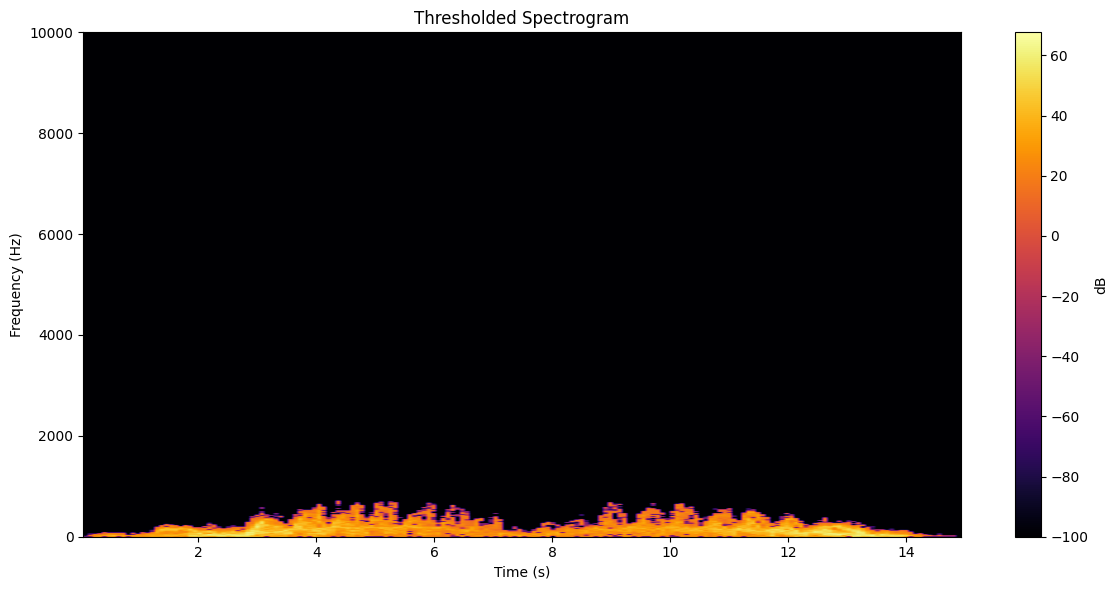

In [34]:
# Convert the spectrogram to dB scale
Sxx_dB = 10 * np.log10(Sxx)

# Apply thresholding
threshold = 10  # dB
Sxx_dB[Sxx_dB < threshold] = -100

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_dB, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 10000)
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Soundcard With DC Power Supply AD620 Gain = 500

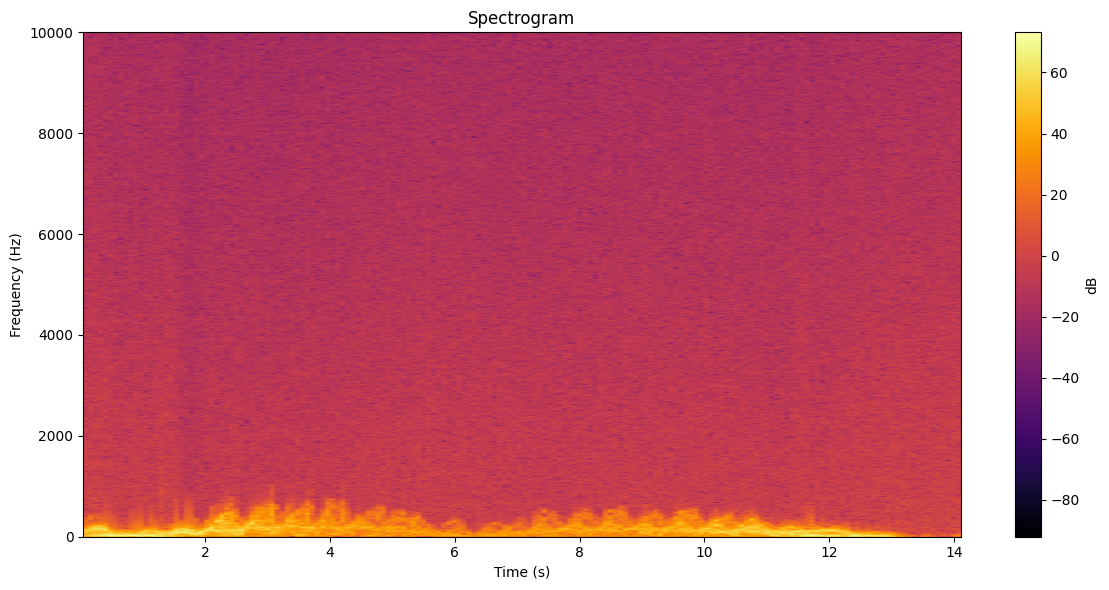

In [31]:
# Plot the original spectrogram# Load the WAV file
filename = 'AD620_DC_Supply_IPM_Gain_500x.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 10000)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

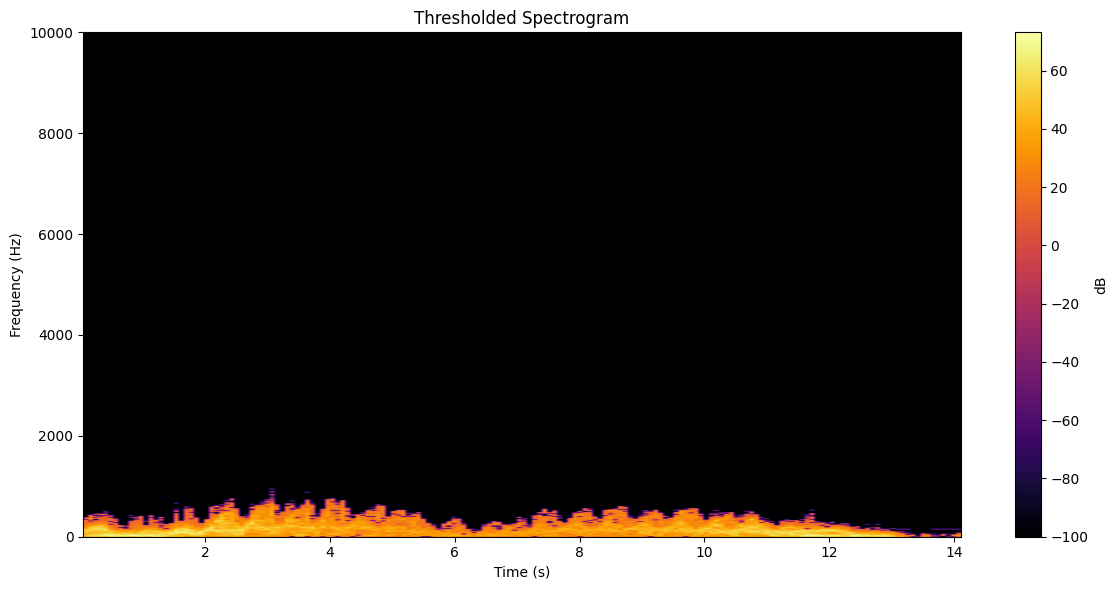

In [32]:
# Convert the spectrogram to dB scale
Sxx_dB = 10 * np.log10(Sxx)

# Apply thresholding
threshold = 10  # dB
Sxx_dB[Sxx_dB < threshold] = -100

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_dB, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 10000)
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# STM32F4 Discovery Board Data

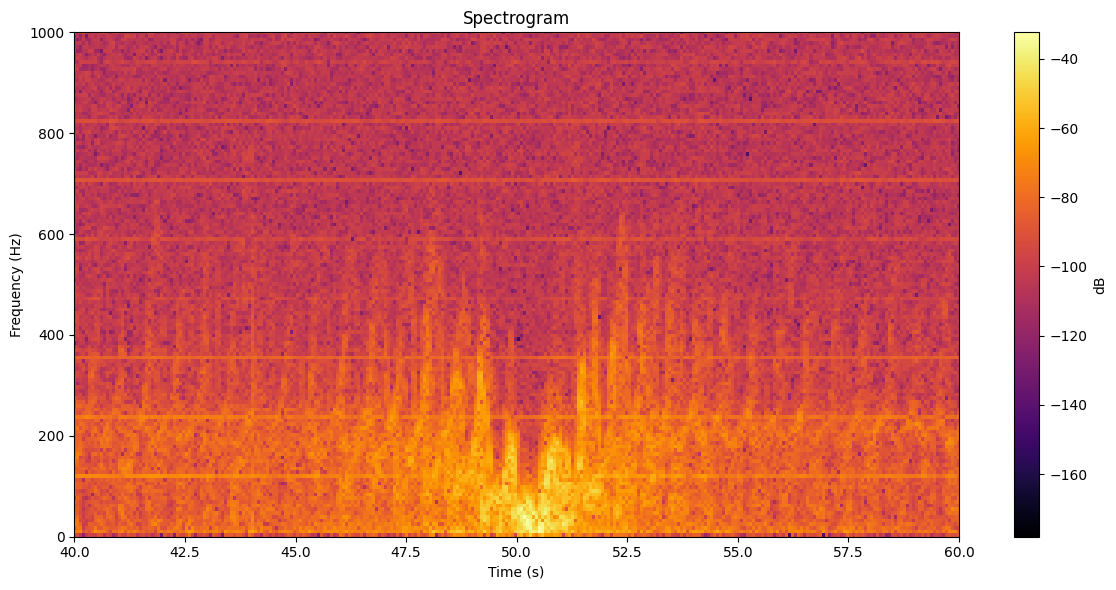

In [5]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open('/home/mishay/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/OtherADCData/HumanWalkingF4DiscoveryBoard.txt', 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### CDM324 Walking Data Powered By DC Power Supply Captured Using STM32F4

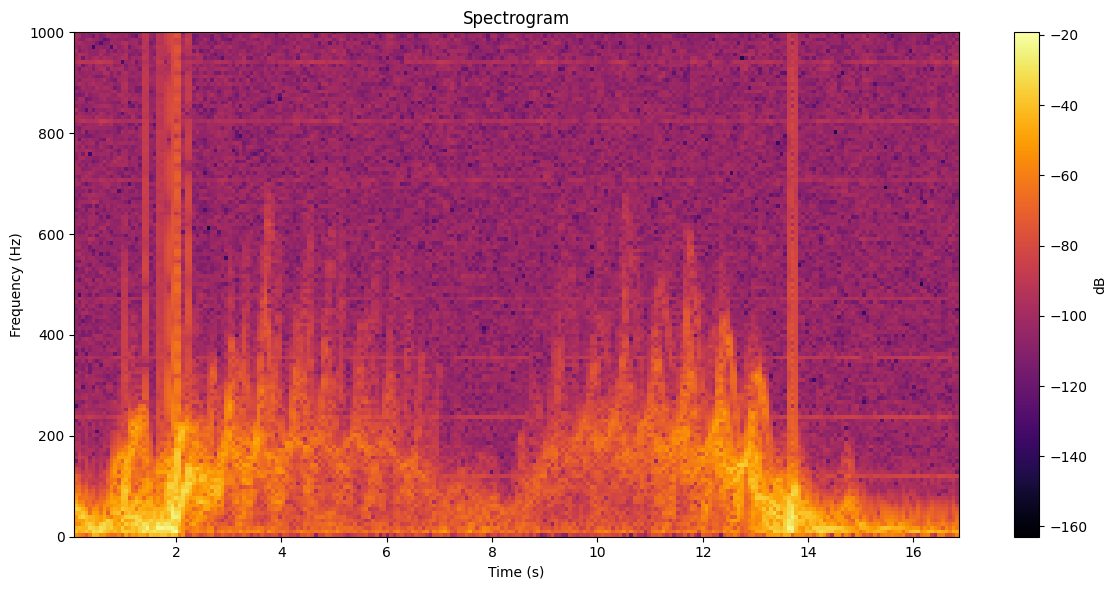

In [11]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open("E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/CDM324WalkingDataF407DCPower.txt", 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### IPM-165 Walking Data Powered By DC Power Supply Captured Using STM32F4

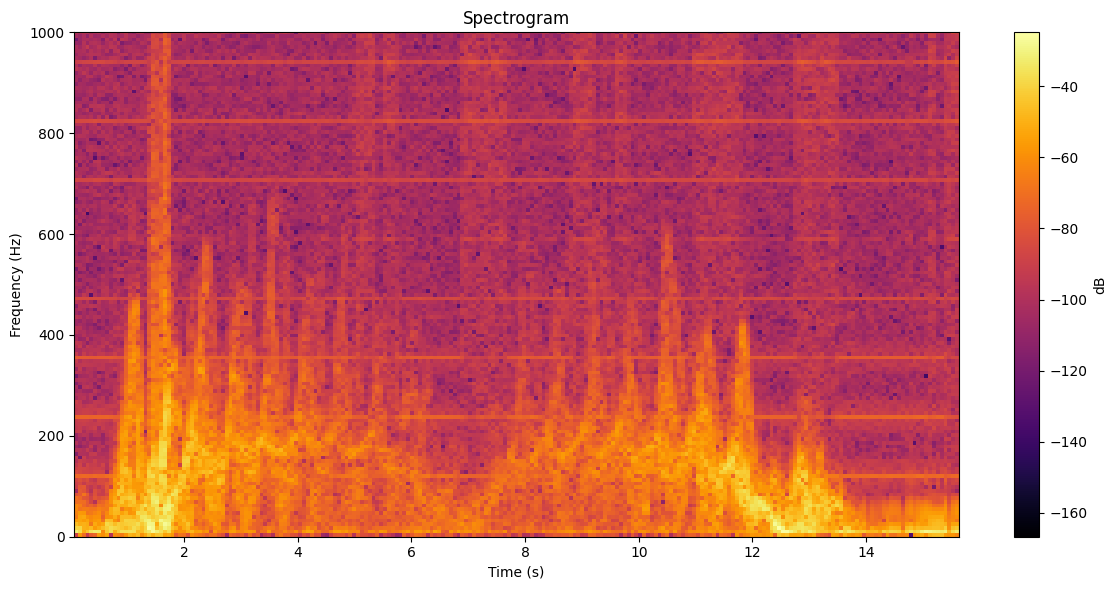

In [4]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open("E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/IPM165WalkingDataF407DCPower.txt", 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### F407 CDM324 DC Power Supply (Not sure how reliable radar lab power supply is)

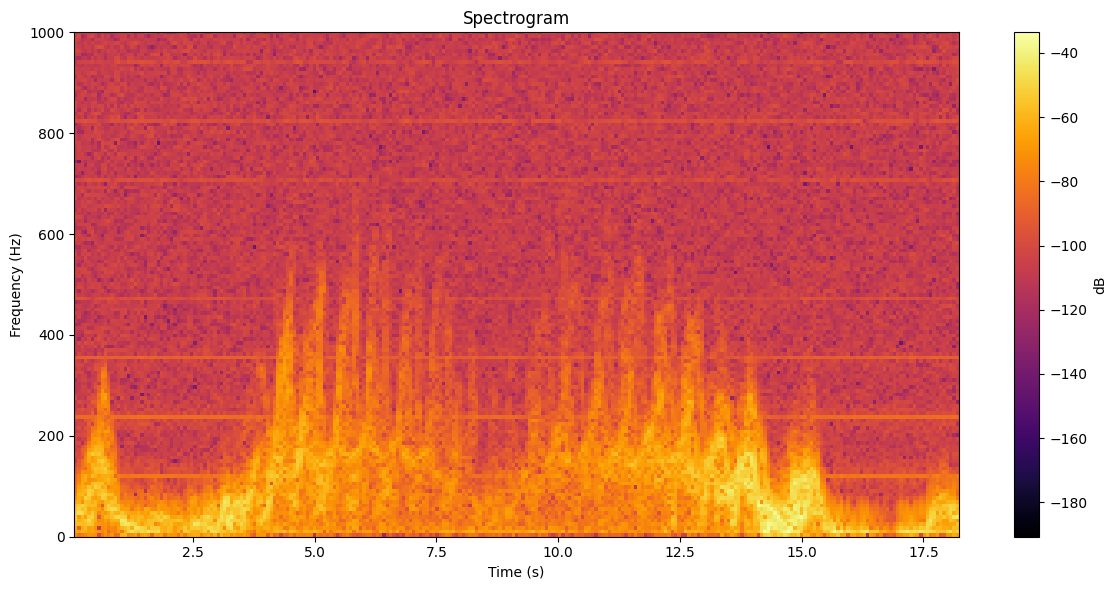

In [9]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open("E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/output.txt", 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### F407 CDM324 Romoss Power Bank

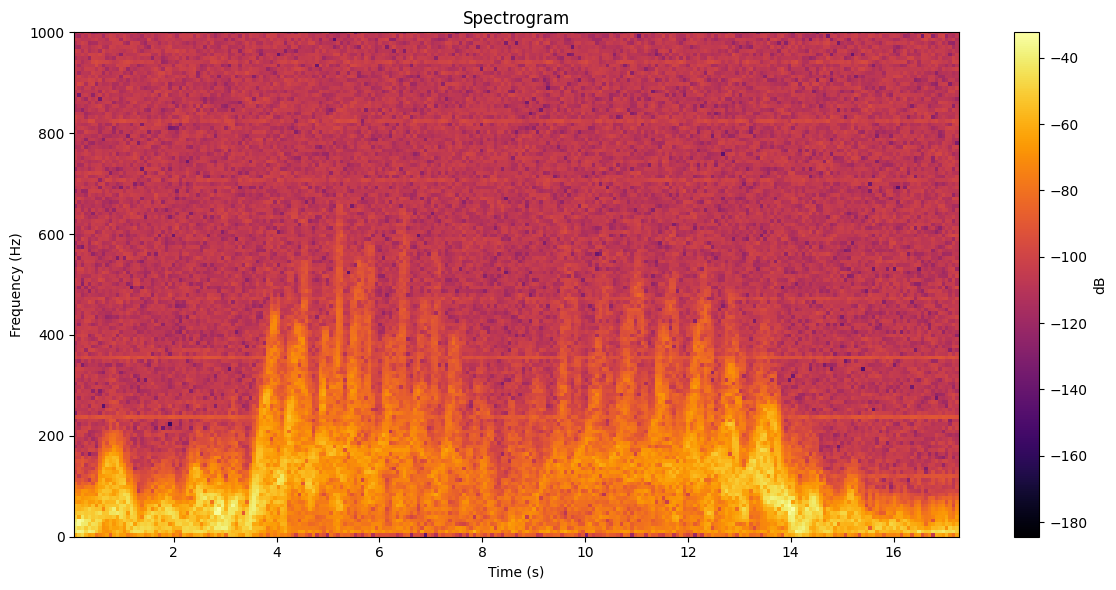

In [18]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open("E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/output2.txt", 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### F407 CMD324 Romoss Power RC LPF 10khz

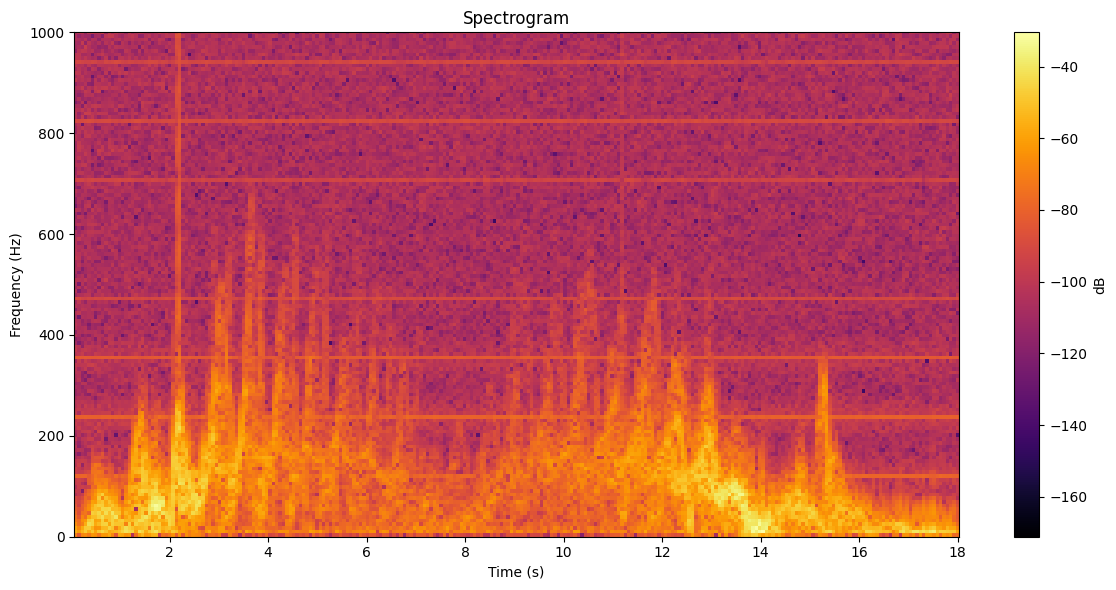

In [17]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open("E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/output3.txt", 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### F407 CMD324 Romoss Power RC LPF 10khz LM386 Audio AMP

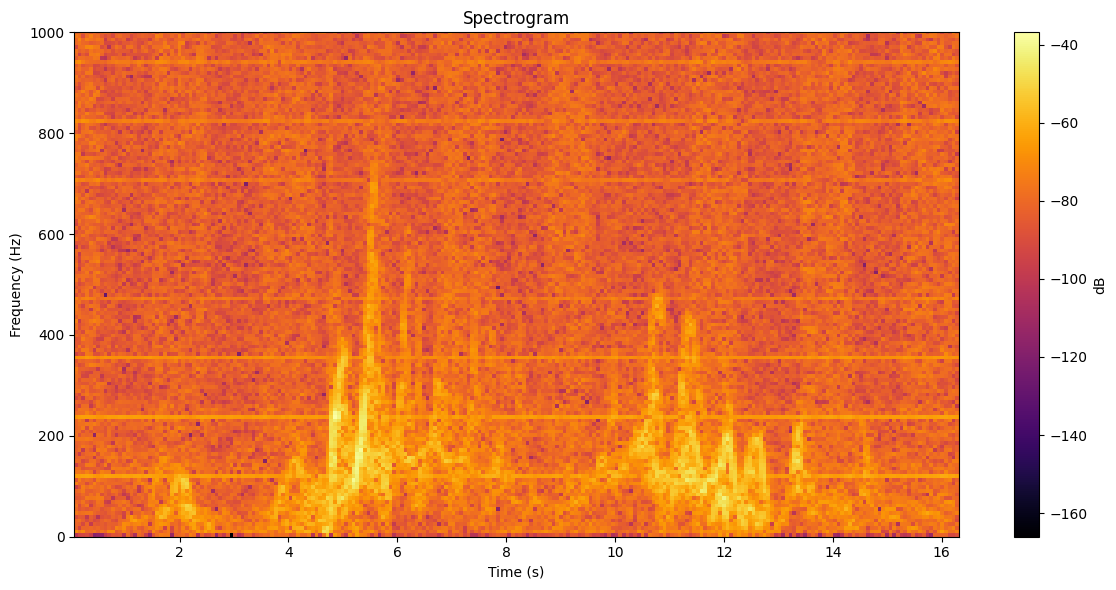

In [2]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open("E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/output4.txt", 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

In [ ]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open("E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/AD620_IPM_DC_Power.txt", 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# PCB V1 Data

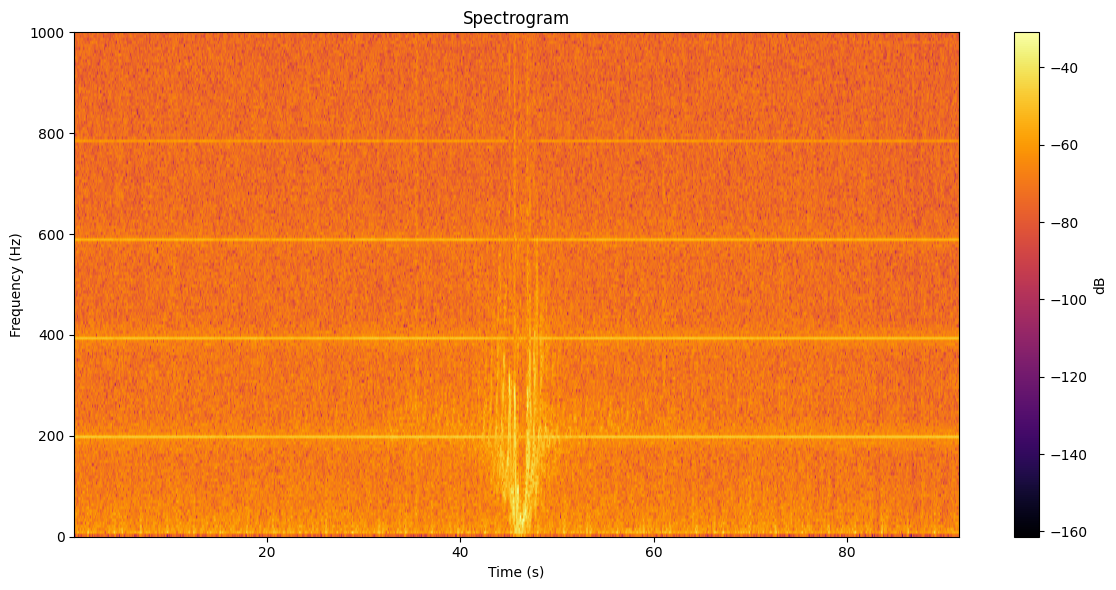

In [12]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 100000  # samples per second

# Step 1: Read ADC Samples from a Binary File
with open('/home/mishay/Traffic-Monitoring-Using-Doppler-Radar/RadarHumanData/OtherADCData/HumanWalkingMyPCB.txt', 'rb') as file:
    raw_data = file.read()

# Step 2: Convert the raw data to a list of integers
adc_samples = [raw_data[i] | (raw_data[i + 1] << 8) for i in range(0, len(raw_data), 2)]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 1000)
#plt.xlim(40, 60)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()